In [1]:
import sys, json
import operator
import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt, style
import numpy as np

In [2]:
def get_best_hits(blastresult):
    
    dataset = blastresult.split('/')[1].split('_')[-1].split('.')[0]
    baithits = dict()
    blasthandle = open(blastresult)

    for line in blasthandle:
            line=line.rstrip()
            blastarray=line.split()
            baitname=blastarray[0]
            bait_align_percentage=float(blastarray[1])
            align_length=int(blastarray[3])
            align_gaps=int(blastarray[5])
            
            baithits[baitname] = bait_align_percentage
    blasthandle.close()
    return baithits


                       

In [3]:

def write_json_baithits(jsonfile, baithits):
    # Write the bait with best hits in json file
    with open(jsonfile, 'w') as baithitjsonfile:
        json.dump(baithits, baithitjsonfile, sort_keys=True, indent=4, separators=(',',';'))



/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


done


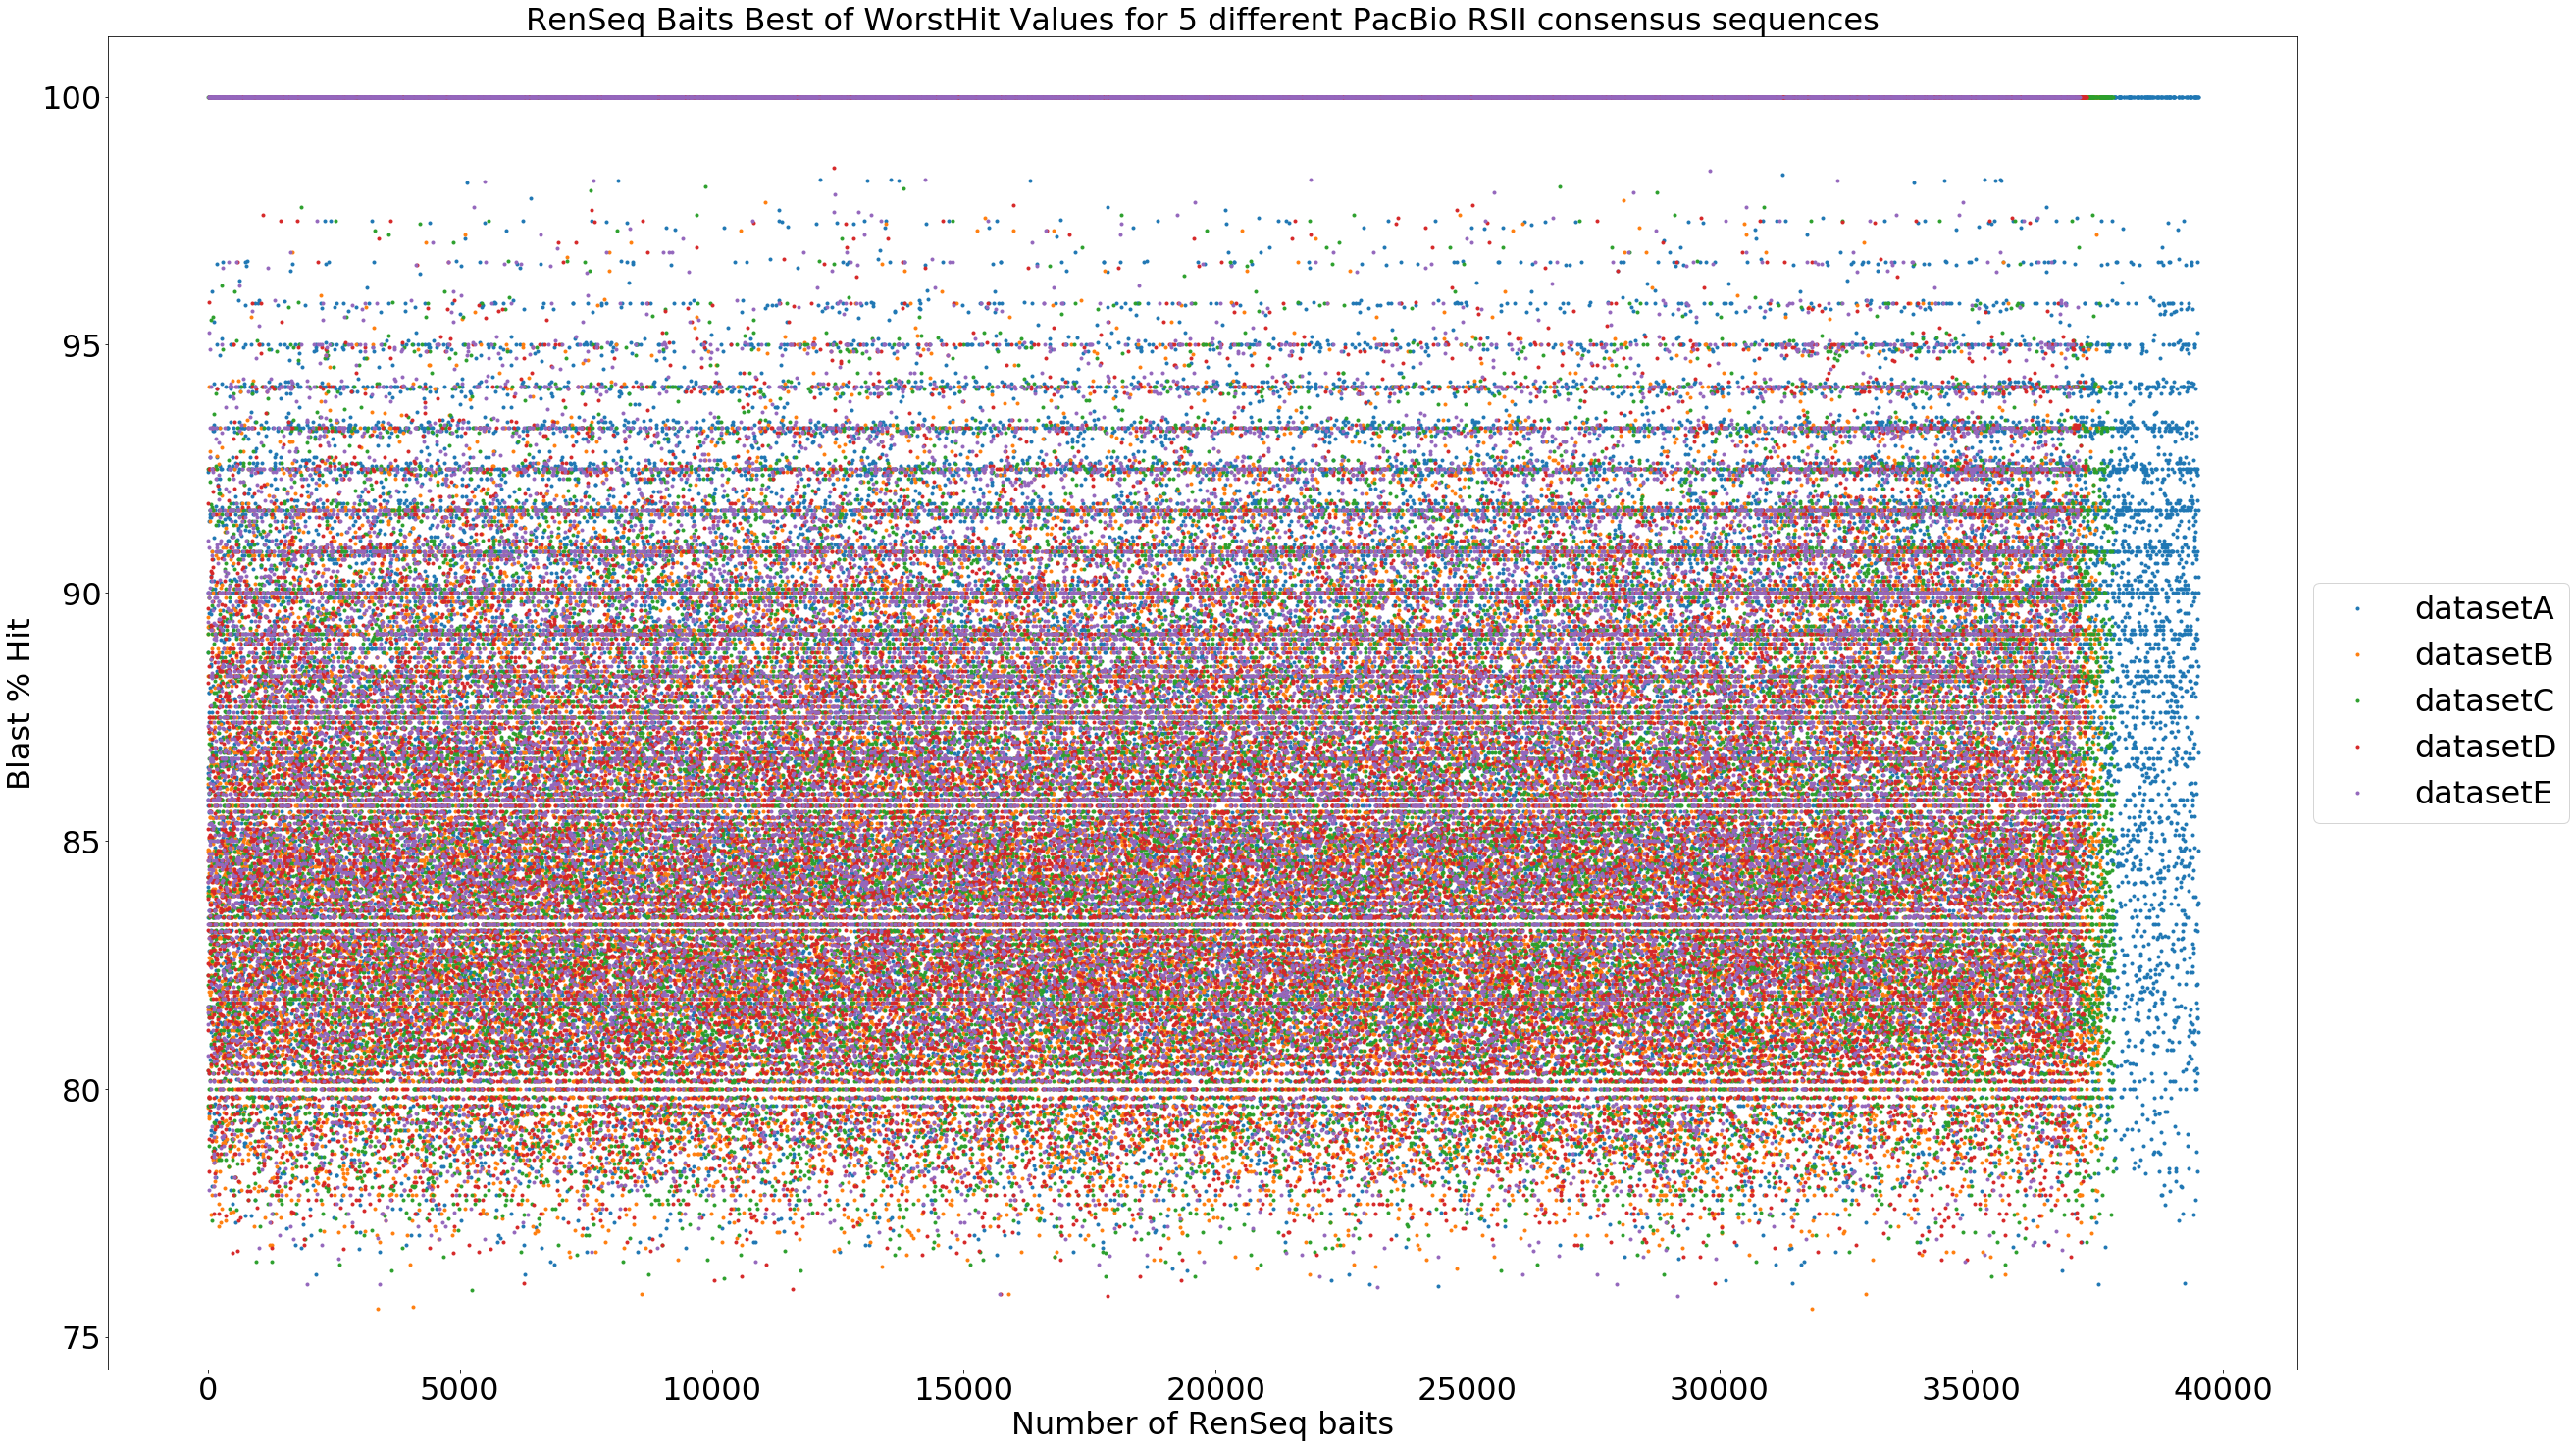

In [4]:
## Analysing the baits lowest hit %id 
## the first record in these files are the lowest hit, as the hits are in ascending order

pacbiodatasetA='results/baits_mapped_to_pacbio_consensus_datasetA.txt.sorted.ascending'
pacbiodatasetB='results/baits_mapped_to_pacbio_consensus_datasetB.txt.sorted.ascending'
pacbiodatasetC='results/baits_mapped_to_pacbio_consensus_datasetC.txt.sorted.ascending'
pacbiodatasetD='results/baits_mapped_to_pacbio_consensus_datasetD.txt.sorted.ascending'
pacbiodatasetE='results/baits_mapped_to_pacbio_consensus_datasetE.txt.sorted.ascending'

pacbiodatasetA_baithits_ascending=get_best_hits(pacbiodatasetA) 
pacbiodatasetB_baithits_ascending=get_best_hits(pacbiodatasetB) 
pacbiodatasetC_baithits_ascending=get_best_hits(pacbiodatasetC) 
pacbiodatasetD_baithits_ascending=get_best_hits(pacbiodatasetD) 
pacbiodatasetE_baithits_ascending=get_best_hits(pacbiodatasetE)


# plot the bait hits
fig = plt.figure(figsize=(40,25))
bestHitValues = np.array(list(pacbiodatasetA_baithits_ascending.values())); plt.plot(bestHitValues, '.')
bestHitValues = np.array(list(pacbiodatasetB_baithits_ascending.values())); plt.plot(bestHitValues, '.')
bestHitValues = np.array(list(pacbiodatasetC_baithits_ascending.values())); plt.plot(bestHitValues, '.')
bestHitValues = np.array(list(pacbiodatasetD_baithits_ascending.values())); plt.plot(bestHitValues, '.')
bestHitValues = np.array(list(pacbiodatasetE_baithits_ascending.values())); plt.plot(bestHitValues, '.')


plt.title("RenSeq Baits Best of WorstHit Values for 5 different PacBio RSII consensus sequences", fontsize=32)
plt.xlabel("Number of RenSeq baits", fontsize=32)
plt.ylabel("Blast % Hit", fontsize=32)
plt.tick_params(which='both', labelsize=32.00)
plt.legend(['datasetA', 'datasetB', 'datasetC', 'datasetD', 'datasetE'], loc = "center left", bbox_to_anchor = (1, 0.5), fontsize=32, numpoints = 1)
fig.savefig('results/baits_best_of_worsehits_in_5_datasets.png')
fig.show()
print("done")


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


done


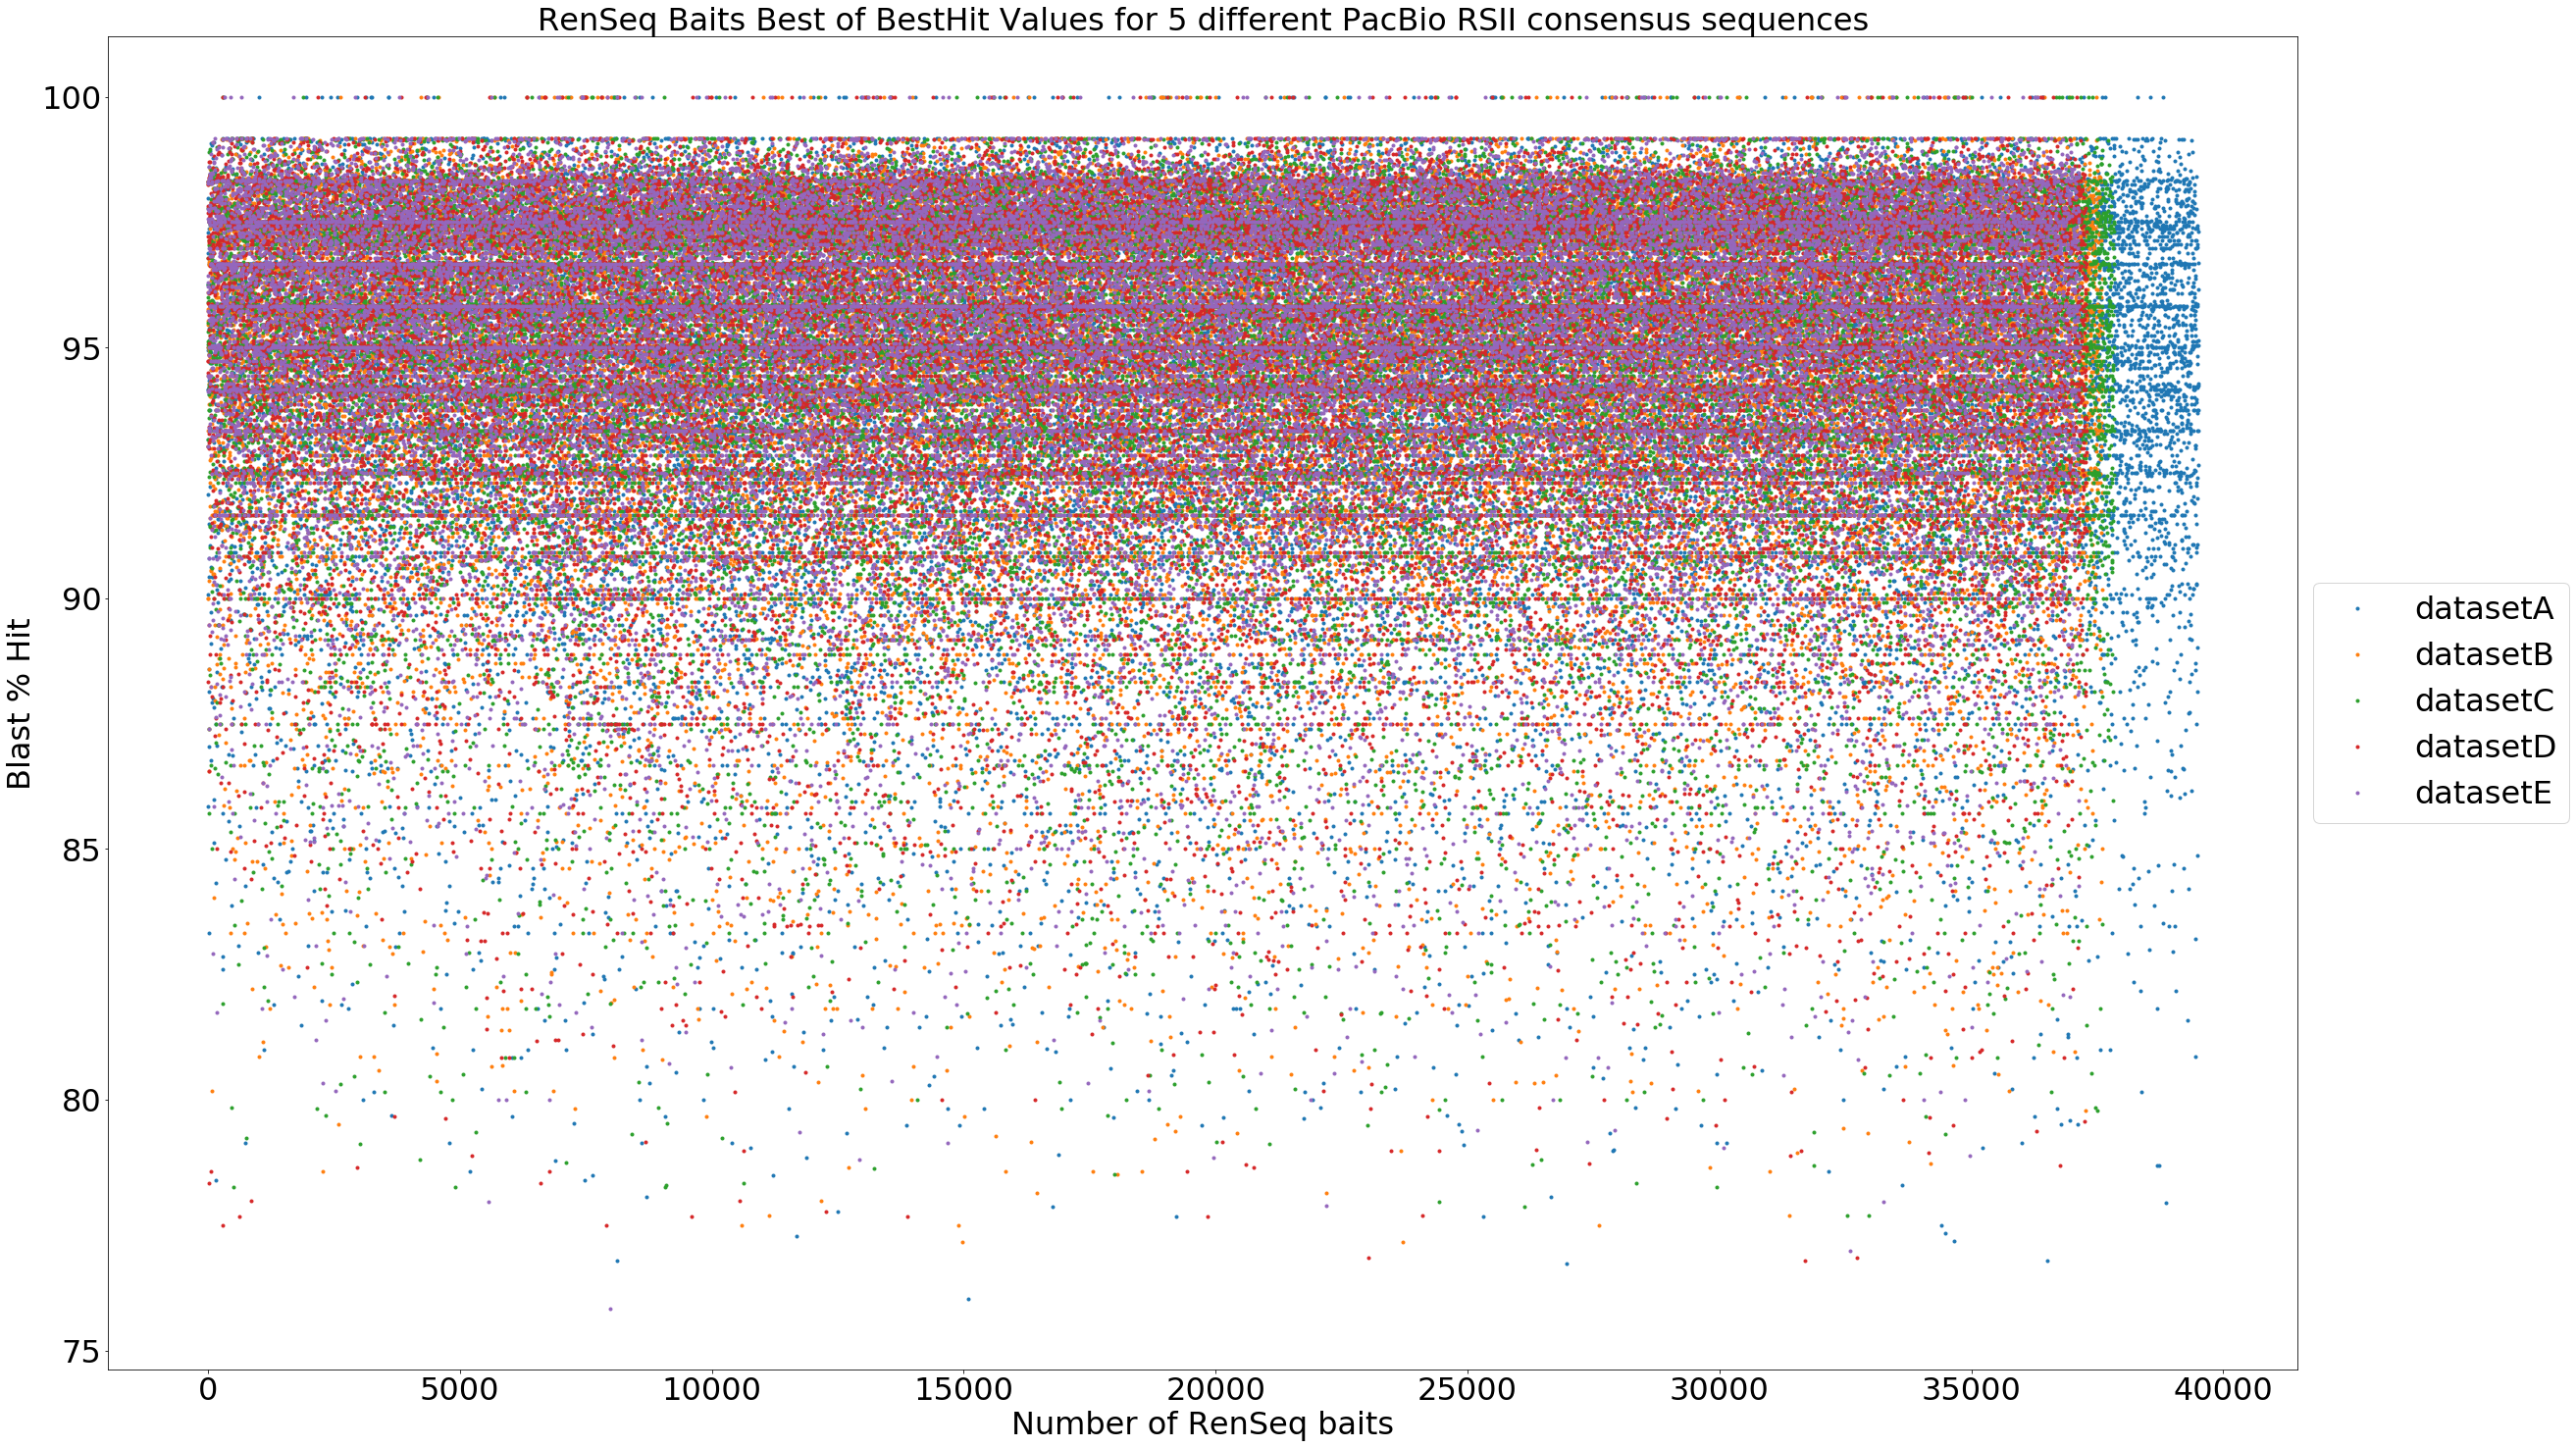

In [6]:
## Analysing the baits highest hit %id 
## the first record in these files are the lowest hit, as the hits are in descending order

pacbiodatasetA_descending='results/baits_mapped_to_pacbio_consensus_datasetA.txt.sorted.descending'
pacbiodatasetB_descending='results/baits_mapped_to_pacbio_consensus_datasetB.txt.sorted.descending'
pacbiodatasetC_descending='results/baits_mapped_to_pacbio_consensus_datasetC.txt.sorted.descending'
pacbiodatasetD_descending='results/baits_mapped_to_pacbio_consensus_datasetD.txt.sorted.descending'
pacbiodatasetE_descending='results/baits_mapped_to_pacbio_consensus_datasetE.txt.sorted.descending'

pacbiodatasetA_baithits_descending=get_best_hits(pacbiodatasetA_descending) 
pacbiodatasetB_baithits_descending=get_best_hits(pacbiodatasetB_descending) 
pacbiodatasetC_baithits_descending=get_best_hits(pacbiodatasetC_descending) 
pacbiodatasetD_baithits_descending=get_best_hits(pacbiodatasetD_descending) 
pacbiodatasetE_baithits_descending=get_best_hits(pacbiodatasetE_descending) 

# plot the bait hits
fig = plt.figure(figsize=(40,25))
bestHitValues = np.array(list(pacbiodatasetA_baithits_descending.values())); plt.plot(bestHitValues, '.'); 
bestHitValues = np.array(list(pacbiodatasetB_baithits_descending.values())); plt.plot(bestHitValues, '.'); 
bestHitValues = np.array(list(pacbiodatasetC_baithits_descending.values())); plt.plot(bestHitValues, '.'); 
bestHitValues = np.array(list(pacbiodatasetD_baithits_descending.values())); plt.plot(bestHitValues, '.'); 
bestHitValues = np.array(list(pacbiodatasetE_baithits_descending.values())); plt.plot(bestHitValues, '.'); 


plt.title("RenSeq Baits Best of BestHit Values for 5 different PacBio RSII consensus sequences", fontsize=32)
plt.xlabel("Number of RenSeq baits", fontsize=32)
plt.ylabel("Blast % Hit", fontsize=32)
plt.tick_params(which='both', labelsize=32.00)
plt.legend(['datasetA', 'datasetB', 'datasetC', 'datasetD', 'datasetE'], loc = "center left", bbox_to_anchor = (1, 0.5), fontsize=32, numpoints = 1)
fig.savefig('results/baits_best_of_besthits_in_5_datasets.png')
fig.show()
print("done")